In [53]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)


In [54]:
df_matches = pd.read_csv("matches.csv", index_col="id")
df_teams = pd.read_csv("teams.csv", index_col="team")

# Matches

In [55]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4284 entries, 9998 to 66936
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          4284 non-null   object
 1   matchDay      4284 non-null   object
 2   matchDayID    4284 non-null   int64 
 3   leagueID      4284 non-null   int64 
 4   leagueName    4284 non-null   object
 5   leagueSeason  4284 non-null   int64 
 6   team1ID       4284 non-null   int64 
 7   team1Name     4284 non-null   object
 8   team1Short    4250 non-null   object
 9   team2ID       4284 non-null   int64 
 10  team2Name     4284 non-null   object
 11  team2Short    4250 non-null   object
 12  team1Goals    4284 non-null   int64 
 13  team2Goals    4284 non-null   int64 
 14  result        4284 non-null   object
dtypes: int64(7), object(8)
memory usage: 535.5+ KB


shortName seems to have _na_ values

In [56]:
df_matches.loc[df_matches["team1Short"].isna(), "team1Name"].value_counts()

team1Name
TSG 1899 Hoffenheim    34
Name: count, dtype: int64

In [57]:
df_matches.loc[df_matches["team1Name"] == "TSG 1899 Hoffenheim", "team1Short"] = "Hoffenheim"
df_matches.loc[df_matches["team2Name"] == "TSG 1899 Hoffenheim", "team2Short"] = "Hoffenheim"

df_matches.to_csv("matches.csv")
df_matches.isna().any()

date            False
matchDay        False
matchDayID      False
leagueID        False
leagueName      False
leagueSeason    False
team1ID         False
team1Name       False
team1Short      False
team2ID         False
team2Name       False
team2Short      False
team1Goals      False
team2Goals      False
result          False
dtype: bool

In [58]:
df_matches.describe()

,matchDayID,leagueID,leagueSeason,team1ID,team2ID,team1Goals,team2Goals
count,4284.00,4284.00,4284.00,4284.00,4284.00,4284.00,4284.00
mean,17.50,2644.36,2016.50,127.91,127.91,1.69,1.32
std,9.81,1883.83,4.03,277.17,277.17,1.38,1.22
min,1.00,159.00,2010.00,6.00,6.00,0.00,0.00
25%,9.00,623.00,2013.00,40.00,40.00,1.00,0.00
50%,17.50,3579.00,2016.50,83.00,83.00,1.00,1.00
75%,26.00,4442.00,2020.00,112.75,112.75,2.00,2.00
max,34.00,4608.00,2023.00,1635.00,1635.00,9.00,8.00


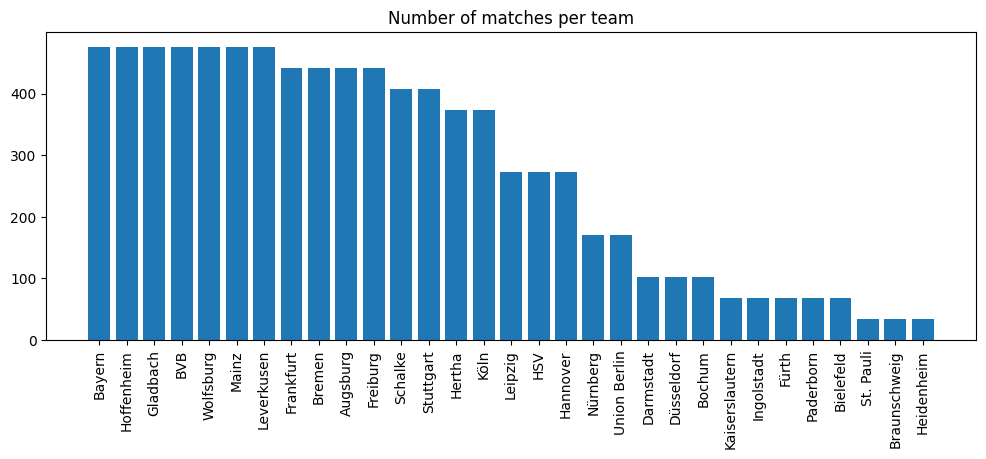

In [59]:
matches_per_team = {}
for name, n_matches in df_matches["team1Short"].value_counts().to_dict().items():
    matches_per_team[name] = n_matches

for name, n_matches in df_matches["team2Short"].value_counts().to_dict().items():
    if name not in matches_per_team:
        matches_per_team[name] = 0
    matches_per_team[name] += n_matches

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Number of matches per team")
ax.bar(matches_per_team.keys(), matches_per_team.values())
ax.set_xticks(range(len(matches_per_team.keys())), matches_per_team.keys(), rotation=90, ha='center')
!

# Teams

In [60]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 6 to 1635
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           252 non-null    int64  
 1   draw           252 non-null    float64
 2   goalDiff       252 non-null    float64
 3   goals          252 non-null    float64
 4   lost           252 non-null    float64
 5   matches        252 non-null    float64
 6   opponentGoals  252 non-null    float64
 7   points         252 non-null    float64
 8   won            252 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 19.7 KB
